# United States Telecommunications Infrastructure Network Analysis - (US-TINA)

### Infrastructure: Fiber optics, routers, base stations, conduits, etc

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import networkx as nx

pd.set_option('precision', 2)
pd.set_option('notebook_repr_html', True)
# pd.set_option('display.mpl_style', 'default')

import seaborn as sns
sns.set_context("talk")
sns.set_style("darkgrid")

import matplotlib.pylab as plt
from IPython.display import Image, HTML

import plotly as py
import cufflinks as cf
import plotly.graph_objs as go

cf.set_config_file(theme='ggplot', sharing='public', offline=False, world_readable=True)
# cf.set_config_file(theme='ggplot', offline=True)


print('Done!')

# from bokeh._legacy_charts import Bar, Histogram, BoxPlot, show


Done!


# TELECOMS CONDUITS  (Channel carrying fiber-optics cables)

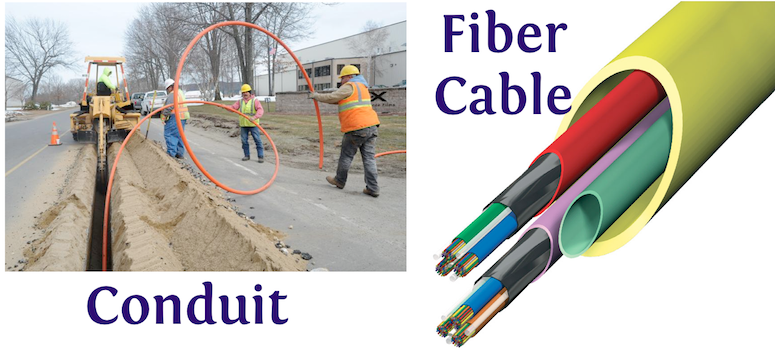

In [443]:
Image("./InterTubes-Dataset/conduit_fiber_cable.png")

# Telecos don't build new conduits ...  &nbsp; they share...

## [Slides Deck @GitHub >>](http://richardafolabi.github.io/Presentation_js/US_Telecoms_Infrastructures.slides.html)
<hr>

### Reasons for infrastructure sharing
1. Complexity - (huge planning, project management, etc)
2. Enormous Cost Overhead - (Labor, rentals, equipment, etc)
3. Environmental Impact - (Digging, road blocks, etc)

### Project Objectives
1. **Evaluate state of current sharing model. What's known? What could it be better?**

2. **Develop new (near) optimal sharing matrix**

3. **Make recommendations (useful for Telecom and City planners)**


### About Dataset
Dataset is made available through PREDICT : https://www.predict.org/
- ** 20 Service Providers ** *(Verizon, AT&T, Sprint, Tata, CenturyLink, Cogent, etc)*
- ** 273 Nodes ** *(Routers, Switches, cell-towers/Base stations, fiber-optic cables, etc)*
- ** 542 Fiber nodes ** *(Edges connecting the nodes)*

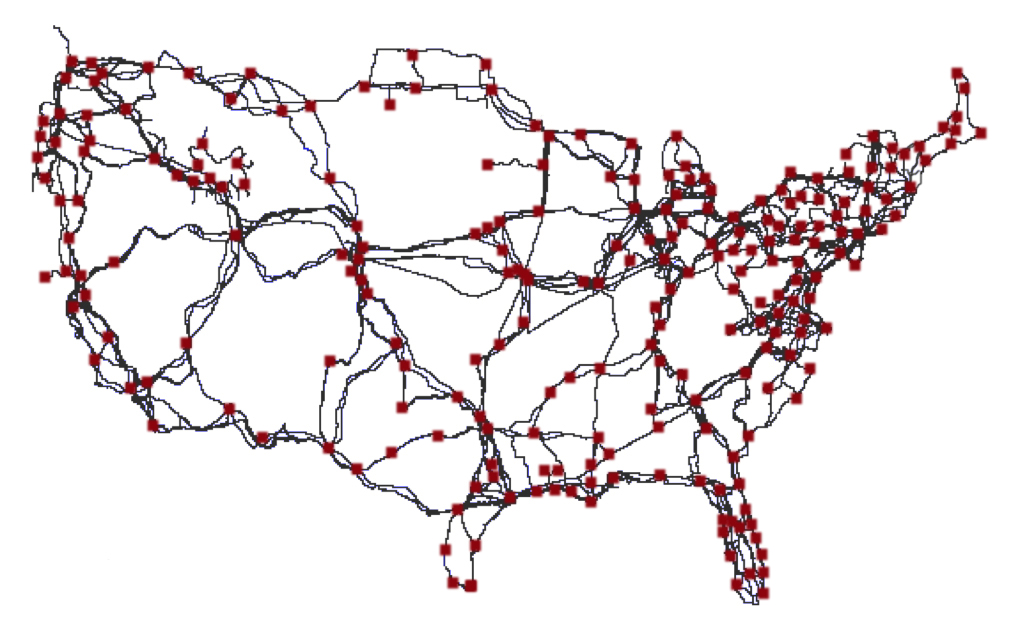

In [58]:
Image("./InterTubes-Dataset/long-haul.jpg", width=750)

# Dataset - Shared Conduit  (edges connecting the nodes)

In [2]:
sharing_url = "https://s3-us-west-2.amazonaws.com/telecoms-analytics-dataset/sharing.txt"
shared_conduit = pd.read_csv(sharing_url, delim_whitespace=True, index_col=0, header=None)
shared_conduit.index.name = 'ISP Names'

# Initialize first column to ISP and set other columns to Sn => "Number of shared conduits"
col_names = []
for k in np.arange(1,shared_conduit.columns.size+1):
    col_names.append('S'+str(k)) 

# Set the columns names and display
shared_conduit.columns = col_names

shared_conduit.head(3)

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S533,S534,S535,S536,S537,S538,S539,S540,S541,S542
ISP Names,,,,,,,,,,,,,,,,,,,,,
ATT,0,0,0,0,0,18,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Verizon,0,0,0,10,0,18,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DeutscheTelekom,0,0,0,0,0,18,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# How do ISPs use the conduits?  
# Who use what? How much does each ISP use?

In [184]:
shared_conduit.head(10)

Conduits,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S533,S534,S535,S536,S537,S538,S539,S540,S541,S542
ISP Names,,,,,,,,,,,,,,,,,,,,,
ATT,0,0,0,0,0,18,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Verizon,0,0,0,10,0,18,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DeutscheTelekom,0,0,0,0,0,18,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
XO,0,0,0,0,0,18,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NTT,0,12,9,10,0,18,11,0,9,0,...,0,0,0,0,0,0,0,0,0,0
TeliaSonera,0,0,0,10,0,18,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sprint,0,0,0,10,3,18,11,0,9,0,...,0,0,0,0,0,0,0,0,0,0
Tata,0,12,0,0,0,18,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CenturyLink,0,12,9,0,0,18,0,0,9,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
sum_across_conduit = shared_conduit.sum(axis=1)
sum_across_conduit.sort_values(ascending=False, inplace=True)
sum_across_conduit = pd.DataFrame(sum_across_conduit)
sum_across_conduit.columns = ['TOTAL CONDUIT']
sum_across_conduit.head()

,TOTAL CONDUIT
ISP Names,
EarthLink,2958
Level3,2914
Comcast,1888
CenturyLink,1843
TWC,1773


In [6]:
sum_across_conduit.iplot(kind='bar', xTitle='ISP Companies', yTitle="CONDUITS used by each ISP", 
                         title="How do ISPs use Shared Fiber Optics Conduits?", filename='incubator/isp_conduit_usage')

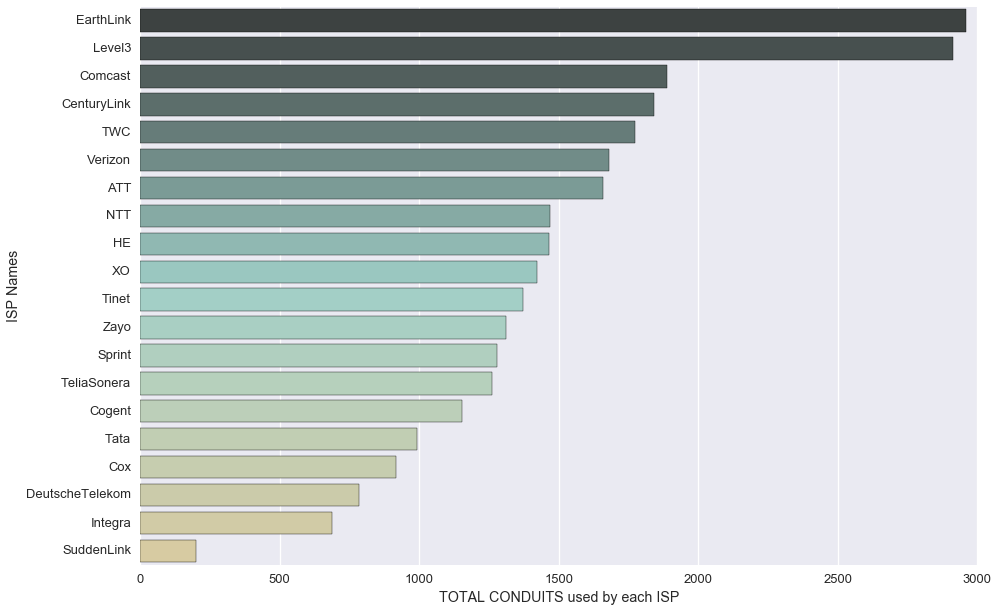

In [208]:
f, ax = plt.subplots(1,1, figsize=(15,10));    
sns.barplot(data=sum_across_conduit, y=sum_across_conduit.index, x='TOTAL CONDUIT', palette='BrBG_d')
plt.xlabel("TOTAL CONDUITS used by each ISP")

# What's the distribution of each ISP's Conduit usage?

Considering the variability, whisker length, etc, we know distribution cannot be Normal.


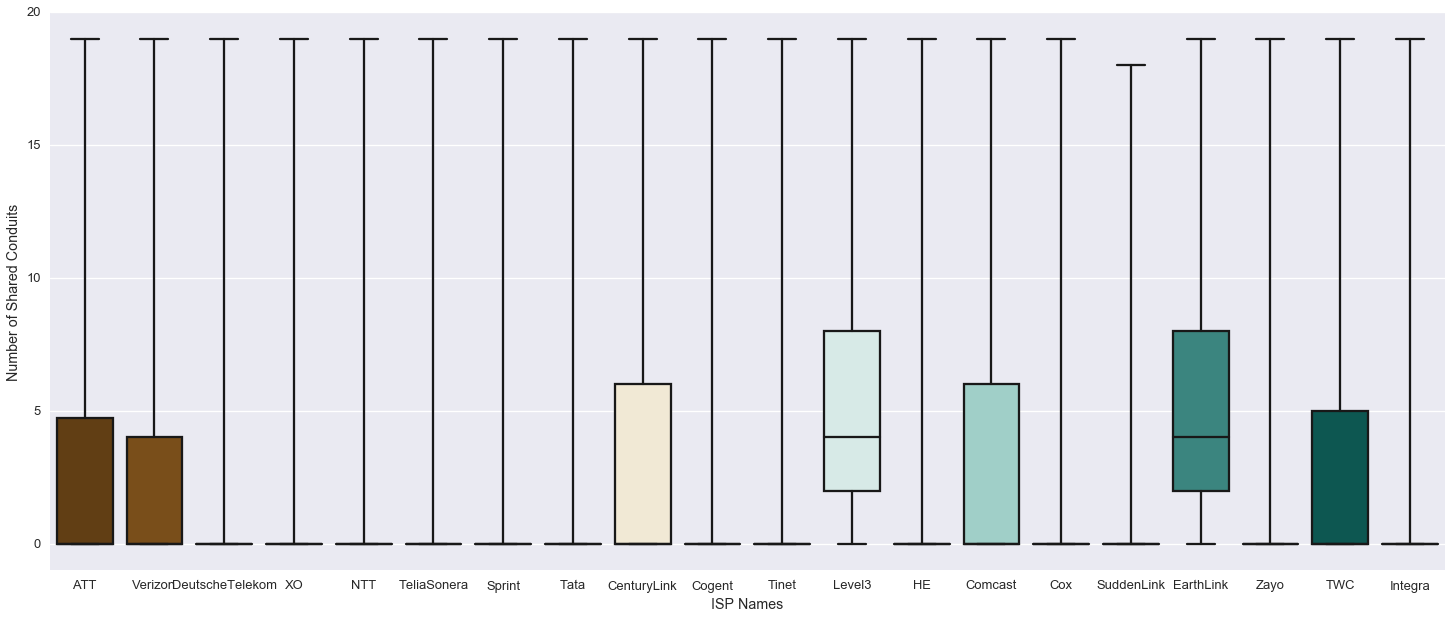

In [5]:
trans_shared_conduit = shared_conduit.transpose().copy()
plt.figure(figsize=(25,10)); plt.ylim(-1,20);  plt.ylabel("Number of Shared Conduits")
sns.boxplot(data=trans_shared_conduit, palette='BrBG', whis=20)
print("Considering the variability, whisker length, etc, we know distribution cannot be Normal.")

# What's the `Usage Patterns` of the top 8 ISP?

In [6]:
top_x = sum_across_conduit.index.values[:7]
data = trans_shared_conduit[top_x]
data.iplot(kind='box', boxpoints='outliers', yTitle='Number of ISP sharing each conduit', orientation='h',
           xTitle='Top ISP Companies', title='Conduit Sharing Distribution of Top 7 ISP Companies',
          legend=False, filename='incubator/top_isps_stats')

Usage Pattern: (Earthlink & Level3) ::::: (Comcast & CenturyLink) ::::: (TWC & ATT & Verizon)


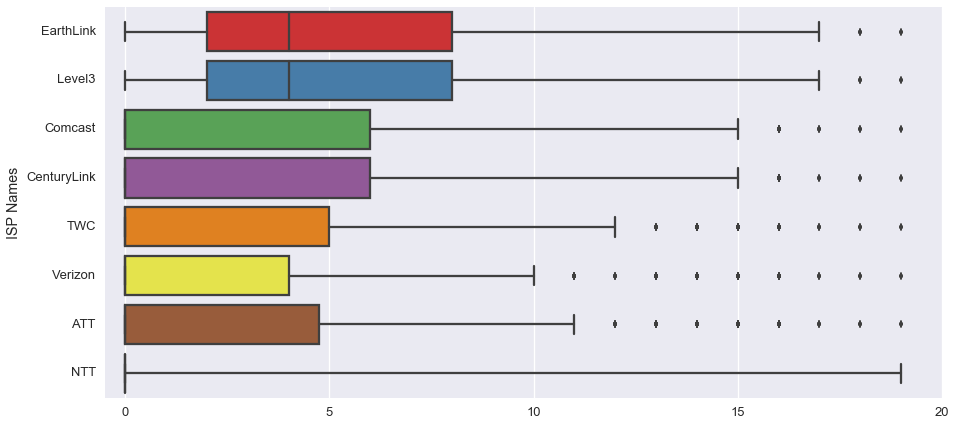

In [45]:
trans_shared_conduit = shared_conduit.transpose().copy()
top_x = sum_across_conduit.index.values[:8]
plt.figure(figsize=(15,7)); plt.xlim(-0.5,20)
ax = sns.boxplot(data=trans_shared_conduit[top_x], orient='h', palette='Set1')
# ax = sns.swarmplot(data=trans_shared_conduit[top_x], orient='h', palette='Set1')
print("Usage Pattern: (Earthlink & Level3) ::::: (Comcast & CenturyLink) ::::: (TWC & ATT & Verizon)")

# How many conduits does an average ISP use? 

In [17]:
top10_ISP_2015 = ['Comcast', 'TWC', 'Verizon', 'ATT', 'Cox', 
                  'Cogent', 'SuddenLink', 'CableOne', 'CenturyLink', 'Level3']


for isp in sum_across_conduit.index:
    try:
        if isp in top10_ISP_2015:
            sum_across_conduit.loc[isp, 'TOP10_ISP_2015'] = 'TOP 10'
        else:
            sum_across_conduit.loc[isp, 'TOP10_ISP_2015'] = 'OTHERS'
    except KeyError:
        pass


sum_across_conduit.head()


,TOTAL CONDUIT,TOP10_ISP_2015
ISP Names,,
EarthLink,2958,OTHERS
Level3,2914,TOP 10
Comcast,1888,TOP 10
CenturyLink,1843,TOP 10
TWC,1773,TOP 10


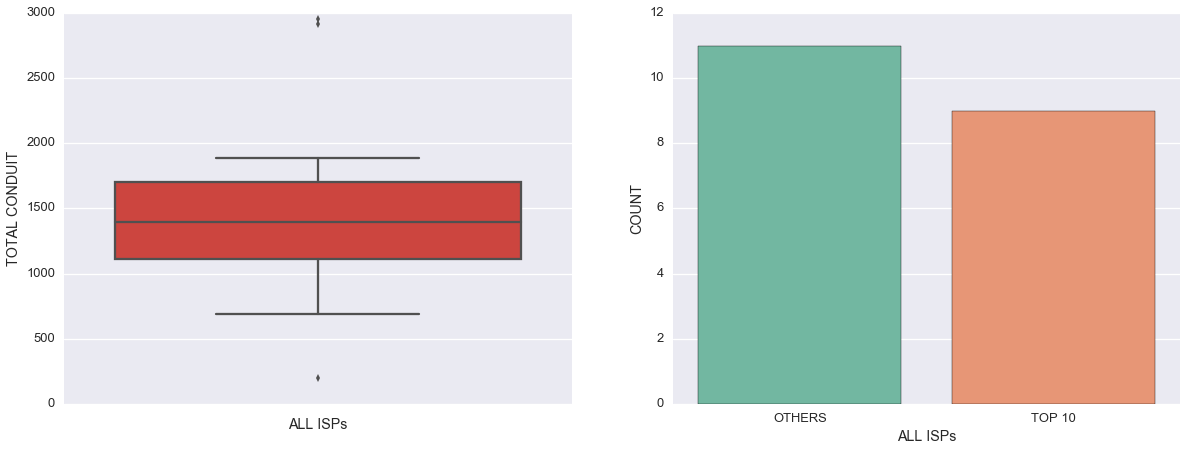

In [18]:

f, axes = plt.subplots(1,2, figsize=(20, 7)); 
ax1 = sns.boxplot(data=sum_across_conduit, y='TOTAL CONDUIT', palette='Reds_d', ax=axes[0])

ax2 = sns.countplot(data=sum_across_conduit, x='TOP10_ISP_2015', palette='Set2', ax=axes[1])
ax1.set_xlabel('ALL ISPs'); ax2.set_xlabel('ALL ISPs'); ax2.set_ylabel('COUNT')

In [127]:
trans_shared_conduit[top_x].head()

ISP Names,EarthLink,Level3,Comcast,CenturyLink,TWC,Verizon,ATT,NTT
Conduits,,,,,,,,
S1,2,2,0,0,0,0,0,0
S2,12,12,12,12,12,0,0,12
S3,9,9,9,9,9,0,0,9
S4,10,10,0,0,10,10,0,10
S5,3,3,0,0,0,0,0,0


# At LEAST How many `ISP` share each conduit?

In [7]:
conduit_counts = [len(shared_conduit[conduit].nonzero()[0]) for conduit in shared_conduit.columns]

df_conduit_counts = pd.DataFrame(conduit_counts, index=shared_conduit.columns)
df_conduit_counts.columns = ['ISP in Conduits']
df_conduit_counts.index.name = 'Conduits'
df = df_conduit_counts['ISP in Conduits']; 

# Compute the 1st, 2nd and 3rd Quantiles
first, secnd, third = df.quantile([.25, .5, .75]) 
df_conduit_counts.head(3)

,ISP in Conduits
Conduits,
S1,2
S2,12
S3,9



Min. : 1 	 Max. : 19 	 Median : 4.0 	 Q1 : 2.0 	 Q2 : 4.0 	 Q3 : 8.0 


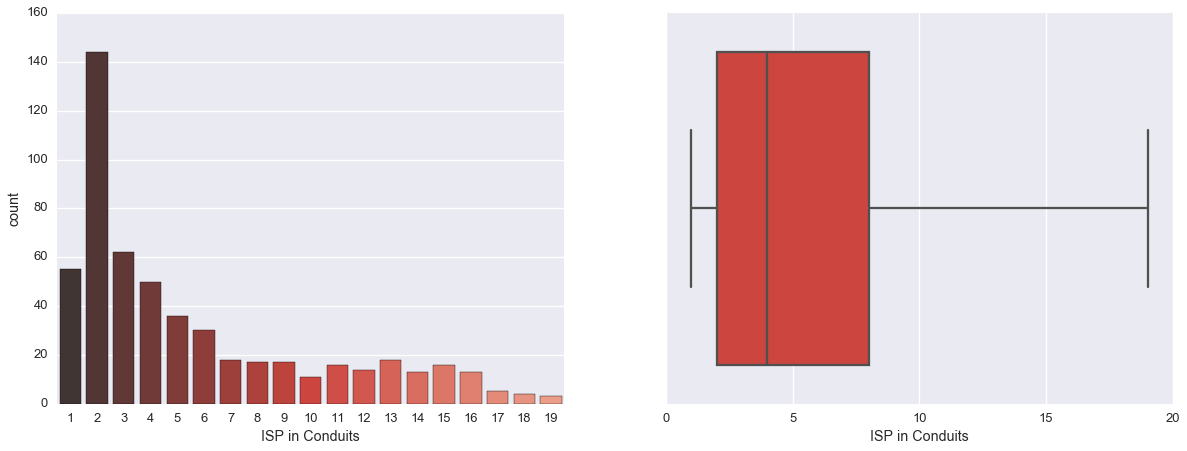

In [8]:
f, axes = plt.subplots(1,2, figsize=(20, 7)); df2 = df_conduit_counts.copy()
ax = sns.boxplot(x='ISP in Conduits', data=df2, palette='Reds_d', ax=axes[1], whis=19)
ax = sns.countplot(x='ISP in Conduits', data=df2, palette='Reds_d', ax=axes[0])

print("\nMin. : {} \t Max. : {} \t Median : {} \t Q1 : {} \t Q2 : {} \t Q3 : {} "
      .format(df.min(), df.max(), np.median(df), first, secnd, third))

In [11]:
df2.iplot(kind='hist', filename='incubator/isp_conduit_stats', colors='darkred', 
          histnorm='percent', xTitle='ISPs in Conduit', yTitle='Percentage', 
          title='Frequencies of Conduit Shared by All ISPs')

In [10]:
df2.iplot(kind='box', filename='incubator/isp_conduit_box', boxpoints='all', 
          yTitle='Number of ISPs', xTitle='ISPs in Conduits', title='How ISPs Share Conduits')

### The Nodes (routers, switches, base stations, etc) and location of installation `Location` (`city;state`)

In [12]:
# Extract dataset into dataframe and verify that there are 273 nodes
column_names = ['Nodes_City_State']
node_url = "https://s3-us-west-2.amazonaws.com/telecoms-analytics-dataset/nodes.txt"

node_city_state = pd.read_csv(node_url, sep='\t', header=None, index_col=0, names=column_names)
node_city_state.index.name = 'Location_Index'

print(node_city_state.shape)
node_city_state.head(3)


(273, 1)


,Nodes_City_State
Location_Index,
1,Abilene;Texas
2,Akron;Ohio
3,Albany;New_York


## Load `Fiber Optics ` conduit dataset

In [13]:
column_names = ['Source', 'Sink']
# edges_url = "./InterTubes-Dataset/links.txt"
edges_url = "https://s3-us-west-2.amazonaws.com/telecoms-analytics-dataset/links.txt"
edges_src_snk = pd.read_csv(edges_url, names=column_names, header=None)

print("\nNumber of links (edges or conduit) : ", edges_src_snk.index.size)
print(edges_src_snk.shape)
edges_src_snk.head()


Number of links (edges or conduit) :  542
(542, 2)


,Source,Sink
0,105,21
1,105,223
2,105,230
3,223,21
4,223,111


## Merge both dataframes, subtituting `Names` for `Index` in both `Source` and `Sink`

In [14]:
on_Source = pd.merge(edges_src_snk, node_city_state, left_on=['Source'], right_index=True)
on_Source.head(2)

,Source,Sink,Nodes_City_State
0,105,21,Harbour_Pointe;Washington
1,105,223,Harbour_Pointe;Washington


# Conduit Locations, Directions and Connectivity across Cities & States

In [15]:
# Merge the Source, Sink with the corresponding codes in both dataframes 
on_Source = pd.merge(edges_src_snk, node_city_state, left_on=['Source'], right_index=True)
source_sink = pd.merge(on_Source, node_city_state, left_on=['Sink'], right_index=True)

# Rename the resulting columns and sort the index 'inplace'
column_names = ['Source_Index', 'Sink_Index', 'Outgoing', 'Incoming']
source_sink.columns = column_names
source_sink.sort_index(inplace=True)

# Get the frequency of Incoming and Outgoing sites and merge into a single Dataframe
all_incoming_outgoing = pd.merge(pd.DataFrame(source_sink['Incoming'].value_counts()), 
                       pd.DataFrame(source_sink['Outgoing'].value_counts()), left_index=True, right_index=True)

all_incoming_outgoing.head()

,Incoming,Outgoing
Denver;Colorado,5,12
Dallas;Texas,4,11
Salt_Lake_City;Utah,2,11
Atlanta;Georgia,7,8
Phoenix;Arizona,4,8


## `LOCATIONS` with HIGHEST INCOMING and OUTGOING fiber Links?

In [16]:
# Sort the dataframe on Outgoing connections
highest_incoming_loc = all_incoming_outgoing.sort_values('Incoming', ascending=False).head(5)

highest_outgoing_loc = all_incoming_outgoing.sort_values(['Outgoing'], ascending=False).head(5)
# highest_outgoing_loc = highest_outgoing_loc.reindex(columns=['Outgoing', 'Incoming'])
highest_outgoing_loc.head()

,Incoming,Outgoing
Denver;Colorado,5,12
Salt_Lake_City;Utah,2,11
Dallas;Texas,4,11
Atlanta;Georgia,7,8
Phoenix;Arizona,4,8


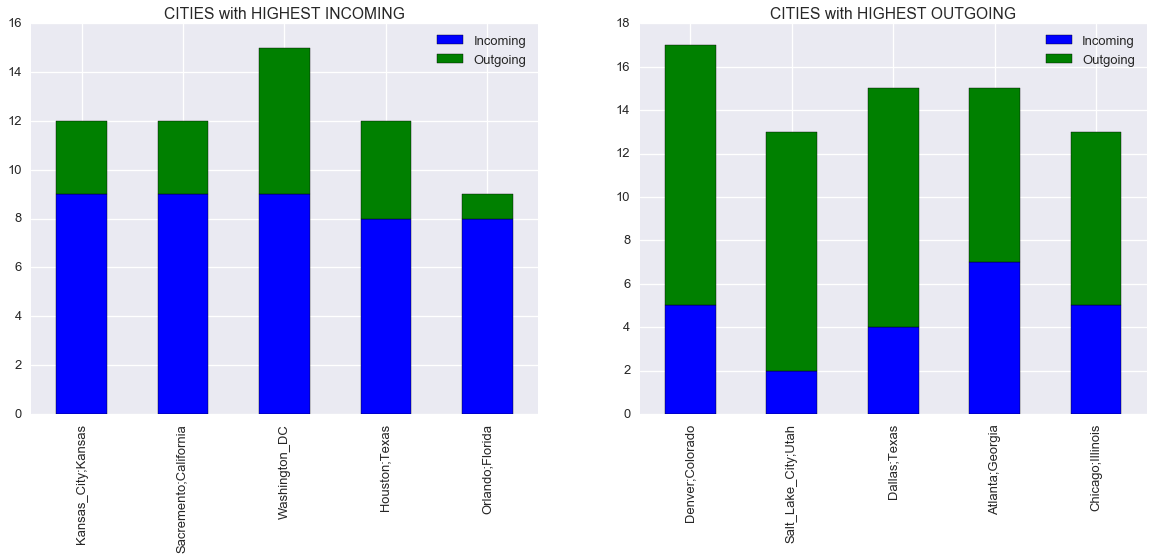

In [10]:
f, axes = plt.subplots(1,2, figsize=(20, 7));
highest_incoming_loc.plot(kind='bar', stacked=True, ax=axes[0], title='CITIES with HIGHEST INCOMING')
highest_outgoing_loc.plot(kind='bar', stacked=True, ax=axes[1], title='CITIES with HIGHEST OUTGOING')

In [26]:
highest_incoming_loc.iplot(kind='bar', barmode='stack', title='Locations with highest INCOMING Links',
                          yTitle='Number of INCOMING Links', filename='incubator/loc_hgst_inc_links')

In [25]:
highest_outgoing_loc.iplot(kind='bar', barmode='stack', title='Locations with highest OUTGOING Links',
                          yTitle='Number of OUTGOING Links', filename='incubator/loc_hgst_outg_links')

## How about `LOCATIONS` with LOWEST INCOMING & OUTGOING Connections?

In [23]:

lowest_outgoing_loc = all_incoming_outgoing.sort_values(['Outgoing']).head(5)
lowest_incoming_loc = all_incoming_outgoing.sort_values('Incoming').head(5)

# lowest_outgoing_loc = lowest_outgoing_loc.reindex(columns=['Outgoing', 'Incoming'])
lowest_outgoing_loc.head()

,Incoming,Outgoing
Durham;North_Carolina,1,1
Troy;New_York,2,1
Columbia;South_Carolina,1,1
Indiana;Pennsylvania,1,1
Fayetteville;North_Carolina,2,1


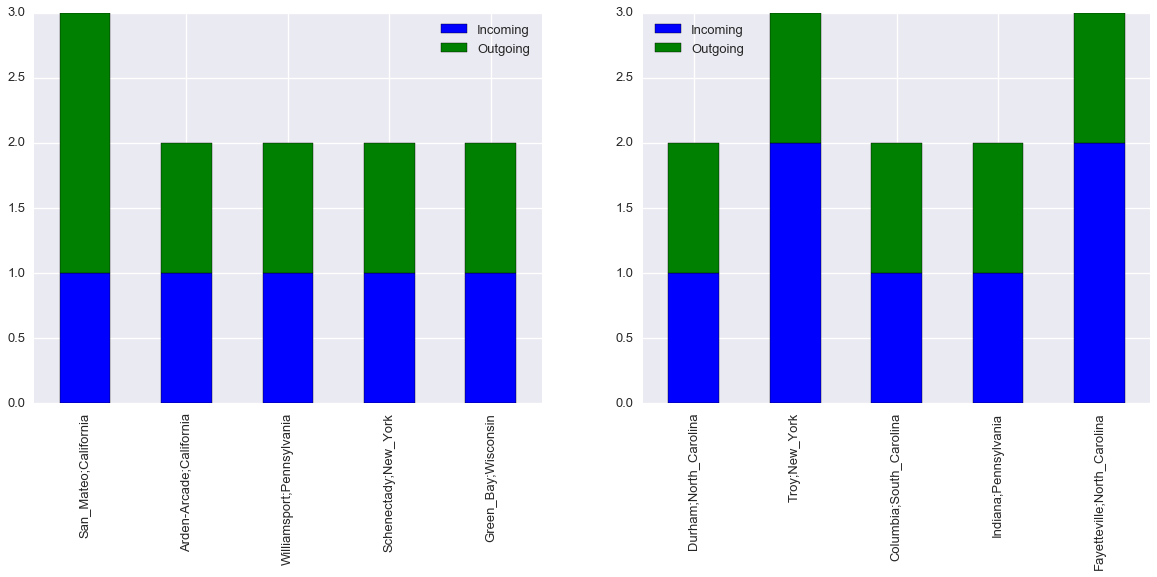

In [24]:
f, axes = plt.subplots(1,2, figsize=(20, 7));

lowest_incoming_loc.plot(kind='bar', stacked=True, ax=axes[0])
lowest_outgoing_loc.plot(kind='bar', stacked=True, ax=axes[1])
# title='Top 5 Locations with LOWEST INCOMING Fiber-optics Connections'

In [27]:
lowest_outgoing_loc.iplot(kind='bar', barmode='stack', title='Locations with lowest OUTGOING Links',
                          yTitle='Number of OUTGOING Links', filename='incubator/loc_lwst_outg_links')

In [28]:
lowest_incoming_loc.iplot(kind='bar', barmode='stack', title='Locations with lowest INCOMING Links',
                          yTitle='Number of INCOMING Links', filename='incubator/loc_lwst_inc_links')

## Is it likely that some `States` have `multiple` installations in the associated `Cities`?
<br>

`Cities` and `States` are not explicitly separated in our data. But we can quickly check if multiple `States` appear in the `Location` names.

In [29]:
source_sink.groupby(['Incoming']).size().head(7)

# We see here that not only does each city have multiple fiber locations, but some states also have
# installations in multiple cities. We need to separate the locations by Cities and States.

Incoming
Abilene;Texas             1
Akron;Ohio                3
Albany;New_York           3
Albuquerque;New_Mexico    3
Allentown;Pennsylvania    2
Altoona;Pennsylvania      1
Amarillo;Texas            2
dtype: int64

## Separate `Cities` and `States` into Columns

In [30]:
source_sink['Incoming_City'] = '';  source_sink['Outgoing_City'] = '';
source_sink['Incoming_State'] = ''; source_sink['Outgoing_State'] = '';

for ndx in source_sink.index:
    # Split both incoming and outgoing on colon to City and State
    incoming = source_sink.Incoming[ndx].split(';')
    outgoing = source_sink.Outgoing[ndx].split(';')
    
    # Populate the Incoming Cities
    source_sink['Incoming_City'].values[ndx] = incoming[0]
    source_sink['Outgoing_City'].values[ndx] = outgoing[0]
    
    # If the State is mising, use the City e.g. Washington DC
    source_sink['Incoming_State'].values[ndx] = incoming[1] if len(incoming) > 1 else incoming[0]
    source_sink['Outgoing_State'].values[ndx] = outgoing[1] if len(outgoing) > 1 else outgoing[0]

# Form new dataframe
new_source_sink = source_sink.drop(['Source_Index', 'Sink_Index', 'Incoming', 'Outgoing'], axis=1)
new_source_sink.head()


,Incoming_City,Outgoing_City,Incoming_State,Outgoing_State
0,Bellevue,Harbour_Pointe,Washington,Washington
1,Seattle,Harbour_Pointe,Washington,Washington
2,Spokane,Harbour_Pointe,Washington,Washington
3,Bellevue,Seattle,Washington,Washington
4,Hillsboro,Seattle,Oregon,Washington


# What is the Link `Utilization Difference` for the `CITIES`?

In [31]:
city_in_out_diff = pd.merge(pd.DataFrame(new_source_sink['Incoming_City'].value_counts()), 
                       pd.DataFrame(new_source_sink['Outgoing_City'].value_counts()),
                       left_index=True, right_index=True)

city_in_out_diff['City_Difference'] = ((city_in_out_diff.Incoming_City - 
                                   city_in_out_diff.Outgoing_City)/city_in_out_diff.Incoming_City) * 100

city_in_out_diff = city_in_out_diff.sort_values('City_Difference', ascending=False)

top5_low5 = [city_in_out_diff.head(), city_in_out_diff.tail()]
top5_low5 = pd.concat(top5_low5)
top5_low5

,Incoming_City,Outgoing_City,City_Difference
Orlando,8,1,87.5
San_Francisco,5,1,80.0
Troy,5,1,80.0
Wilmington,4,1,75.0
Lubbock,4,1,75.0
Orange_County,1,5,-400.0
San_Diego,1,5,-400.0
Des_Moines,1,5,-400.0
Salt_Lake_City,2,11,-450.0
Minneapolis,1,7,-600.0


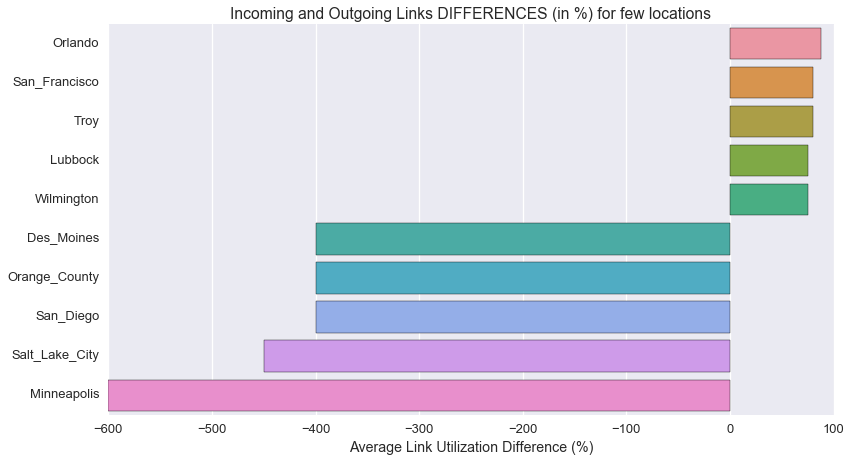

In [285]:
ax = plt.figure(figsize=(13,7))
sns.barplot(x='City_Difference', y=top5_low5.index.values, data=top5_low5, label='City_Difference')
plt.xlabel('Average Link Utilization Difference (%)')
plt.title('Incoming and Outgoing Links DIFFERENCES (in %) for few locations')

# What is the Link `Utilization Difference` for the `STATES`?

In [18]:
state_in_out_diff = pd.merge(pd.DataFrame(new_source_sink['Incoming_State'].value_counts()), 
                       pd.DataFrame(new_source_sink['Outgoing_State'].value_counts()),
                       left_index=True, right_index=True)

state_in_out_diff['State_Difference'] = ((state_in_out_diff.Incoming_State - 
                                    state_in_out_diff.Outgoing_State)/state_in_out_diff.Incoming_State) * 100

state_in_out_diff = state_in_out_diff.sort_values('State_Difference', ascending=False)

print("Total States: ", state_in_out_diff.index.size)

state_in_out_diff;


Total States:  42


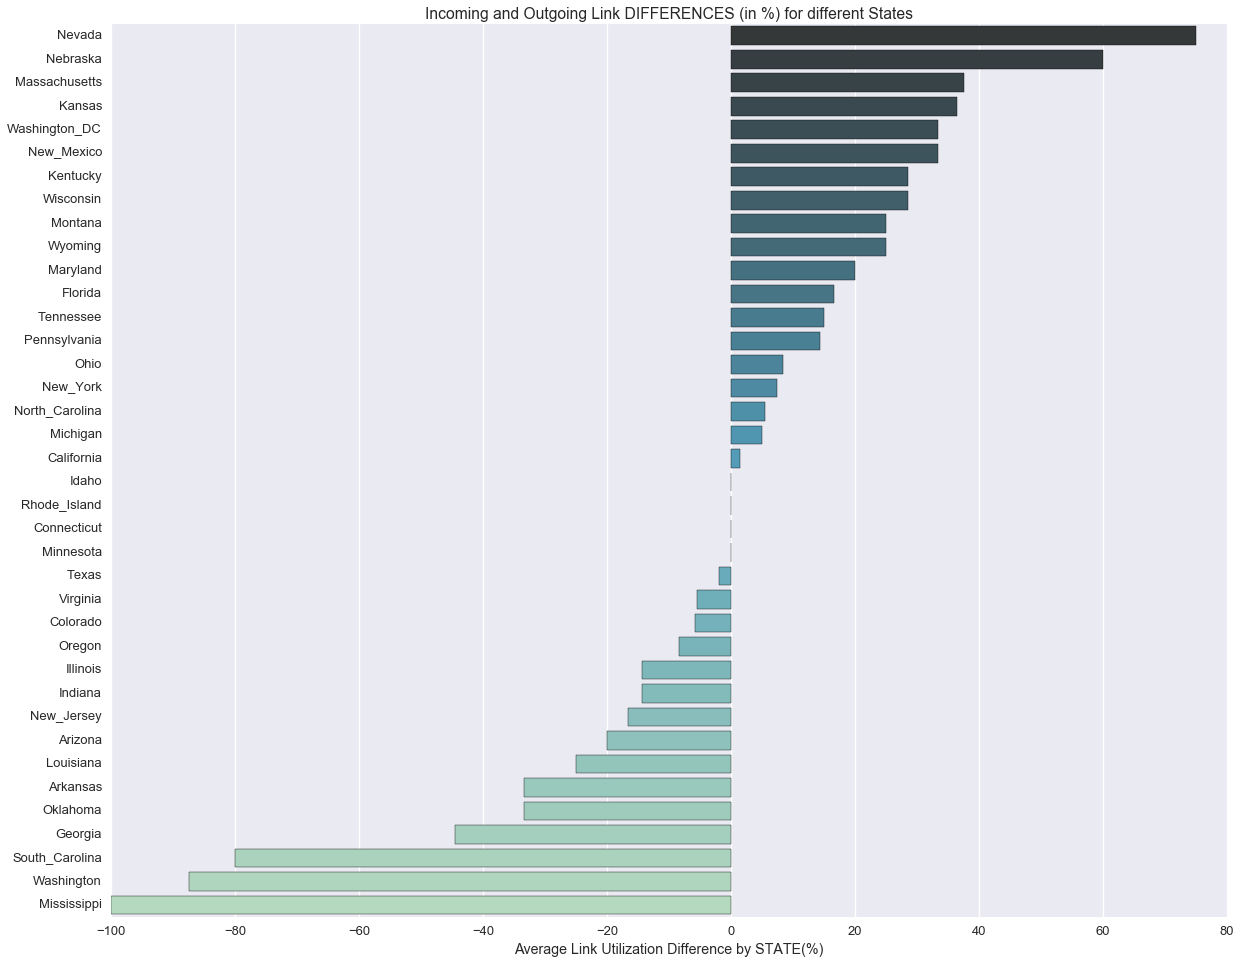

In [297]:
ax = plt.figure(figsize=(20,16)); df = state_in_out_diff;
sns.barplot(x='State_Difference', y=df.index[:38], data=df.head(38), palette='GnBu_d')
plt.xlabel('Average Link Utilization Difference by STATE(%)')
plt.title('Incoming and Outgoing Link DIFFERENCES (in %) for different States')

# Are there Correlations in the number of connections among the `CITIES` 

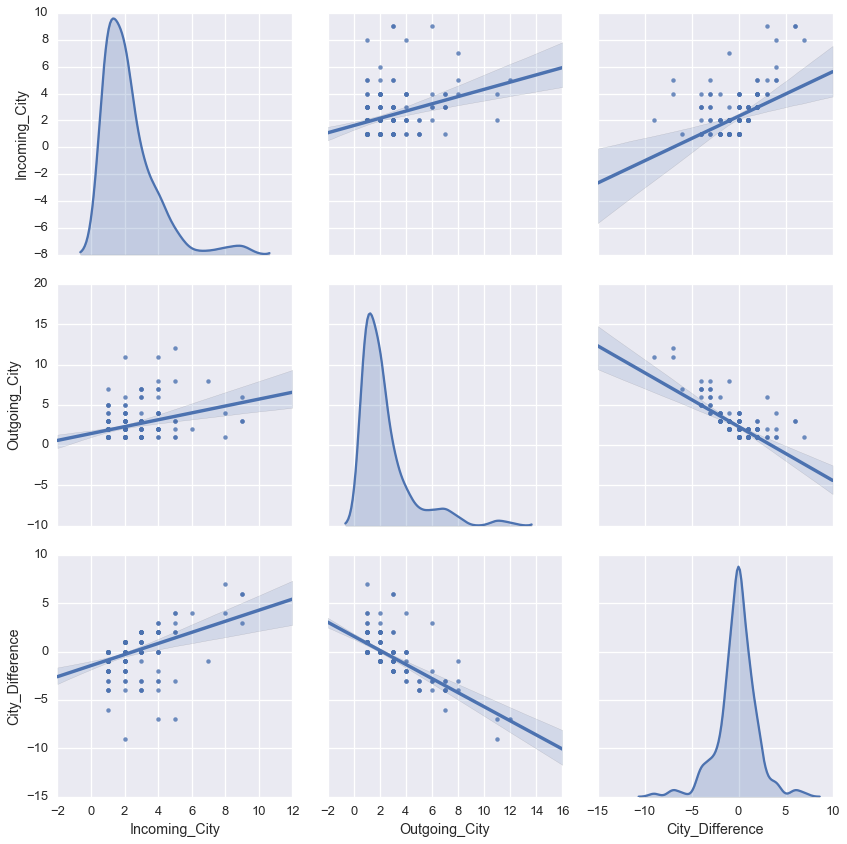

In [444]:
city_in_out_diff['City_Difference'] = city_in_out_diff.Incoming_City - city_in_out_diff.Outgoing_City
px = sns.pairplot(city_in_out_diff, diag_kind="kde", kind="reg", diag_kws=dict(shade=True), size=4)
px.savefig("/Users/RichardAfolabi/myGitHub/turaquo/static/img/city_corr_diff")

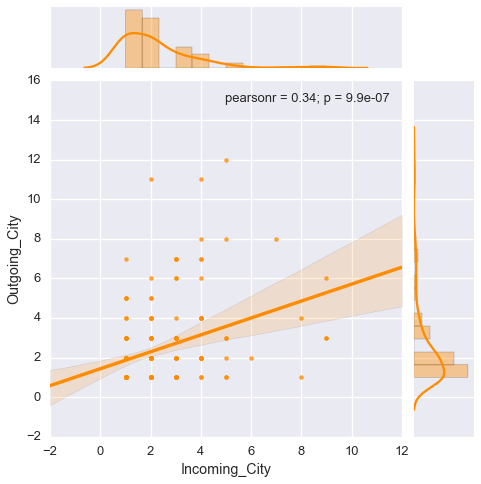

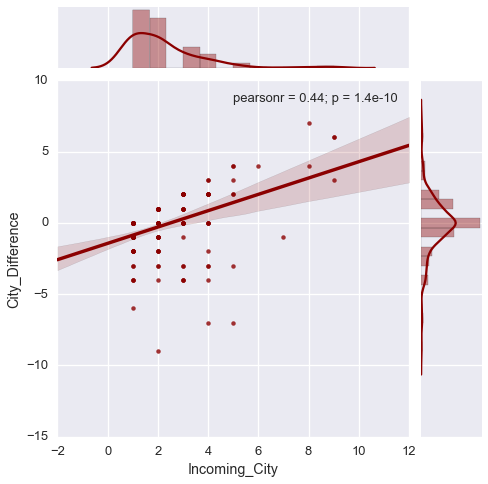

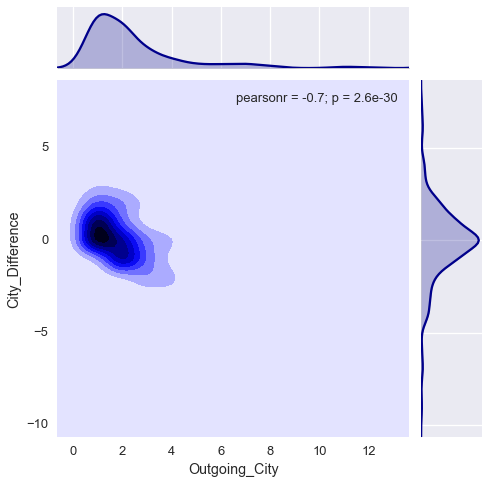

In [366]:
p1 = sns.jointplot("Incoming_City", "Outgoing_City", data=city_in_out_diff, color='darkorange', kind='reg', size=7)
p2 = sns.jointplot("Incoming_City","City_Difference", data=city_in_out_diff, color='darkred', kind='reg', size=7)
p3 = sns.jointplot("Outgoing_City","City_Difference", data=city_in_out_diff, color='darkblue', kind='kde', size=7)


p1.savefig("/Users/RichardAfolabi/myGitHub/turaquo/static/img/state_out_vs_in")
p2.savefig("/Users/RichardAfolabi/myGitHub/turaquo/static/img/state_in_vs_diff")
p3.savefig("/Users/RichardAfolabi/myGitHub/turaquo/static/img/state_out_vs_diff")

# How about Correlations in the Nos of connections among `STATES` 

In [19]:
state_in_out_diff['State_Difference'] = state_in_out_diff.Incoming_State - state_in_out_diff.Outgoing_State
state_in_out_diff = state_in_out_diff.sort_values('State_Difference', ascending=True)

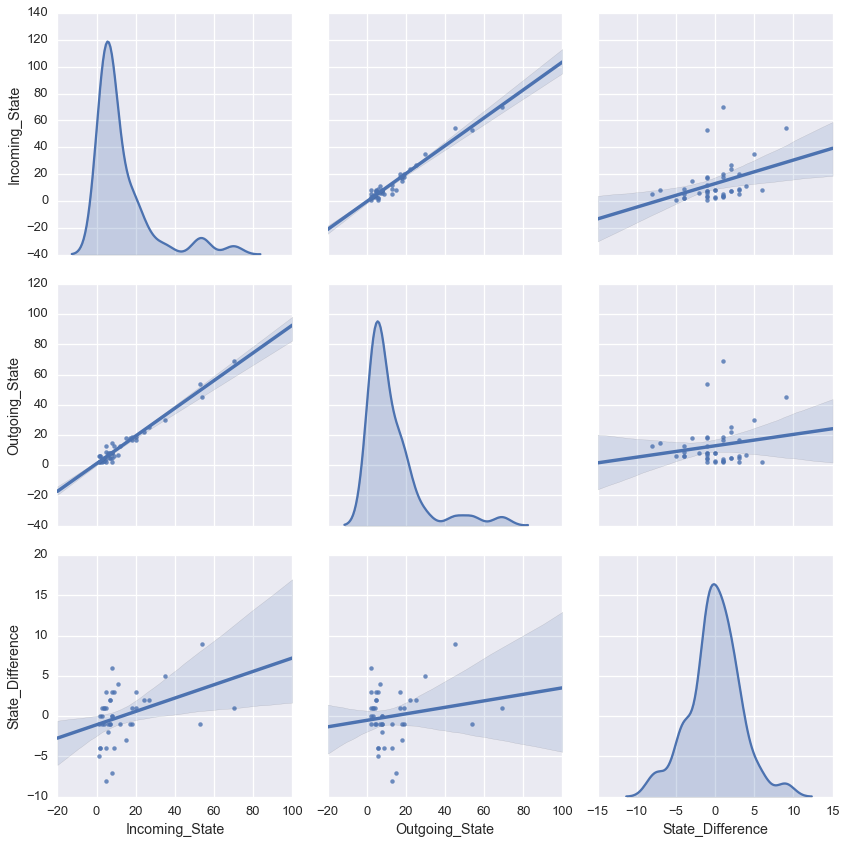

In [445]:
# Plot regression line and a matrix of correlation plots for the data
pw = sns.pairplot(state_in_out_diff, diag_kind="kde", kind="reg", diag_kws=dict(shade=True), size=4)
pw.savefig("/Users/RichardAfolabi/myGitHub/turaquo/static/img/state_corr_diff")

## Finer correlation information...

`Pearson r` is a measure of the linear correlation or dependency between two variables. When Linear equation describes the relationship between X and Y perfectly, Pearson is = 1.

-  1, if Y increases as X increases.
- -1, if Y decreases as X increases.
-  0, if no linear correlation between the variables.



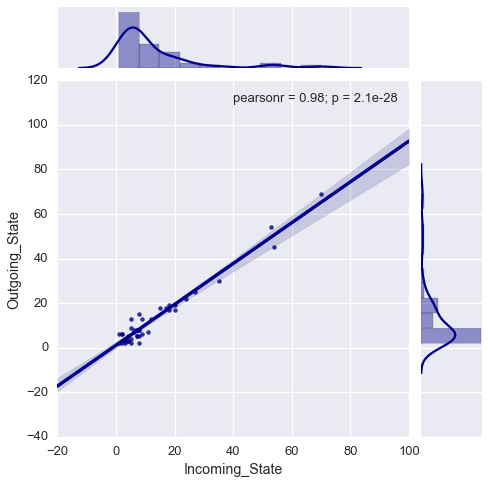

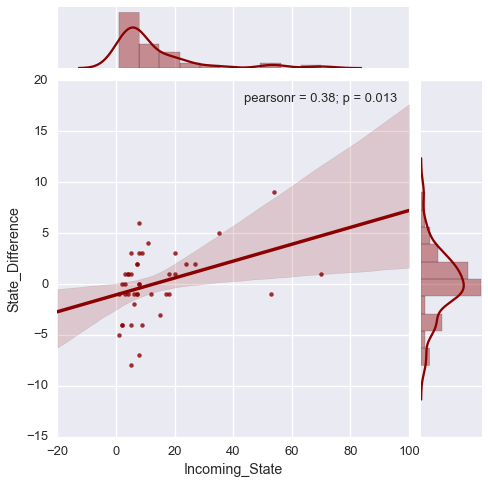

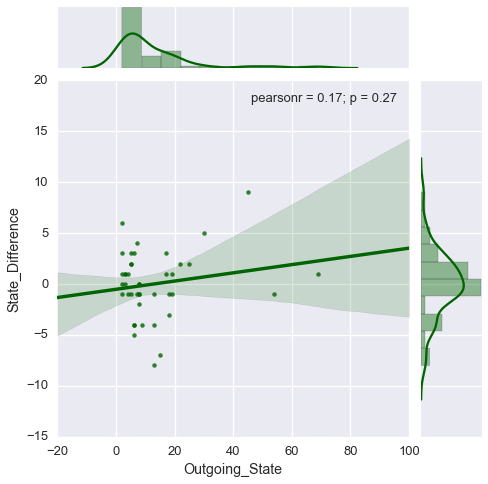

In [365]:
p1 = sns.jointplot("Incoming_State", "Outgoing_State", data=state_in_out_diff, kind='reg', color='darkblue', size=7)
p2 = sns.jointplot("Incoming_State","State_Difference", data=state_in_out_diff, kind='reg', color='darkred', size=7)
p3 = sns.jointplot("Outgoing_State","State_Difference", data=state_in_out_diff, kind='reg', color='darkgreen', size=7)

p1.savefig("/Users/RichardAfolabi/myGitHub/turaquo/static/img/state_out_vs_in")
p2.savefig("/Users/RichardAfolabi/myGitHub/turaquo/static/img/state_in_vs_diff")
p3.savefig("/Users/RichardAfolabi/myGitHub/turaquo/static/img/state_out_vs_diff")

# Web Scraping and Data Augmentation


### Map Plot to visualize the distribution of infrastructures within the United States


We need to encode the US `States` using `Postal Code` before we can overlay on an interactive map. PostalCode is not provided in data.

http://www.infoplease.com/ipa/A0110468.html contains list of `US States` and relevant `PostalCode`. We go ahead and `scrape` the page. `Clean` the scraped data and `merge` with our existing dataframe.



## Scrape the webpage for US States and PostalCodes >> 

## http://www.infoplease.com/ipa/A0110468.html

<br>


In [15]:

# Scrape web data for US States Abbrevations and Postal Codes.   http://www.infoplease.com/ipa/A0110468.html

def postalcode_scraper():
    """ Scrapes a known URL and returns a Pandas dataframe containing 
    list of US States as index and their Postal Codes as column values.
    """
    # URL to scrape
    data_url = "http://www.infoplease.com/ipa/A0110468.html"
    
    # Scrape the page with Pandas 
    table_scrape = pd.read_html(data_url)[1]
    
    # Subtitute spaces in State names with '_' to confirm with existing dataset
    table_scrape[0] = [tab.replace(' ','_') for tab in table_scrape[0] ]
    
    # Reindex using corrected state names to confirm to existing dataframe formats
    table_scrape.index = table_scrape[0]
    
    # Remove extranous data elements and unneeded columns
    table_scrape.drop([0,1], axis=1, inplace=True)
    table_scrape.drop('State', inplace=True)

    # Set column and index names.
    table_scrape.index.name = 'State'
    table_scrape.columns = ['PostalCode']
    
    return table_scrape


postalcode_table = postalcode_scraper()
postalcode_table.head()

,PostalCode
State,
Alabama,AL
Alaska,AK
American_Samoa,AS
Arizona,AZ
Arkansas,AR


# Merge result of scraping with existing dataframe

In [20]:
state_map = state_in_out_diff[['Incoming_State', 'Outgoing_State']].copy()
state_map['State_Difference'] = state_map.Incoming_State - state_map.Outgoing_State

state_map = pd.merge(state_map, postalcode_table, left_index=True, right_index=True, how='left')

# check those state with missing Postal code and encode them manually.
# print(state_map[state_map.PostalCode.isnull()])

# Since Washington DC has no state, we can directly encode as 'DC
state_map.ix['Washington_DC'] = state_map.ix['Washington_DC'].fillna('DC')

# # Then check again...
# print(state_map.ix['Washington_DC'])

state_map['US_States'] = state_map.index
state_map.index = state_map.PostalCode
state_map.drop('PostalCode', axis=1, inplace=True)

state_map.head(3)


,Incoming_State,Outgoing_State,State_Difference,US_States
PostalCode,,,,
UT,5,13,-8,Utah
WA,8,15,-7,Washington
AL,1,6,-5,Alabama


## Are there some states without Fiber Optic Connections?

In [21]:
def find_states_missing(df):
    """ Returns dataframe of states missing from our dataset """
    states_missing = []
    postcodes = postalcode_scraper()

    for st in postcodes.PostalCode:
        if st not in df.index:
            d = postcodes.loc[postcodes['PostalCode'] == st]
            states_missing.append(d)

    states_missing = pd.concat(states_missing)
    states_missing['US_States'] = states_missing.index
    states_missing.index = states_missing.PostalCode.values
    states_missing.drop('PostalCode', axis=1, inplace=True)

    return states_missing

# Call the functions and create relevant dataset
missing_states = find_states_missing(state_map)

missing_states.head()

,US_States
AK,Alaska
AS,American_Samoa
DE,Delaware
GU,Guam
HI,Hawaii


# Let's `overlay` the exploratory data on the US Maps

In [22]:
import jinja2
from collections import OrderedDict

from bokeh.palettes import brewer
from bokeh.models import HoverTool
from bokeh.embed import components
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_notebook, hplot, vplot, show
from bokeh.charts import BoxPlot, Histogram, Bar, vplot, hplot
from bokeh.sampledata import us_states, us_cities

output_notebook()

BokehJS successfully loaded.

In [23]:
def assign_color(code):
    """ Assign specific color contrast to state based on link difference. """
    link_diff = state_map.State_Difference.ix[code]
    if link_diff < 0:     # Outgoing more than incoming links
        colr = "#ED8466"  # Negative => Light Red
    else:                 # incoming link > outgoing, Link diff > 0.
        colr = colors[min(link_diff, len(colors))]   # Assign one of the color contrasts
    return colr


state_names = []
state_colors = []
state_incoming_link = []
state_outgoing_link = []

usa_states = us_states.data.copy()
del usa_states['AK']; 
del usa_states['HI']; 

state_map = state_map.sort_values('State_Difference', ascending=False)

missing_states = find_states_missing(state_map)
us_state_xs = [usa_states[code]["lons"] for code in usa_states]
us_state_ys = [usa_states[code]["lats"] for code in usa_states]

colors = ["#D1E2F2", "#ADCCE5", "#77B0D4", "#448BC0", "#449CC0",
          "#2B62B2","#2264AB", "#0D408E", "#294F70", "#273A48"]


# Iterate over US Long/Lat list.
for code in usa_states:
    # If code exist for infrastructure state
    if code in state_map.index.values:
        state_colors.append(assign_color(code))
        state_names.append(state_map.US_States.ix[code])
        state_incoming_link.append(state_map.Incoming_State.ix[code])
        state_outgoing_link.append(state_map.Outgoing_State.ix[code])
    else:
        # No link in State 
        state_colors.append('#979383')        # Shade of gray
        state_names.append(missing_states.US_States.ix[code])
        state_incoming_link.append(0)
        state_outgoing_link.append(0)

source = ColumnDataSource( 
    data = dict(
        x=us_state_xs, 
        y=us_state_ys, 
        color=state_colors, 
        name=state_names, 
        incoming=state_incoming_link,
        outgoing=state_outgoing_link
    ))


        
TOOLS="pan,wheel_zoom,box_zoom,reset,hover,save"

plot = figure(tools=TOOLS, plot_width=900, plot_height=600, toolbar_location='left')
plot.title=('Fiber-Optics Coverage within United States')
plot.patches('x', 'y', fill_color='color', line_color="#333333", line_width=0.5, source=source)

# Configure the tooltips
hover = plot.select(dict(type=HoverTool))
hover.point_policy = "follow_mouse"
hover.tooltips = OrderedDict([
    ("Name ", "@name"),
    ("Incoming Fiber Links ", " @incoming"),
    ("Outgoing Fiber Links ", " @outgoing")
])


# show(plot)

In [19]:
show(plot)
# Image("../turaquo/static/img/fiber-optix-links.png")

## Prototype : Embedding Plots on webpage using `Bokeh`,  `Flask` & `Jinja2`

In [428]:
# Create skeletal jinja2 HTML template

template = jinja2.Template("""
<!DOCTYPE html>
<html lang="en-US">

<link
    href="http://cdn.pydata.org/bokeh/release/bokeh-0.9.0.min.css"
    rel="stylesheet" type="text/css"
>
<script 
    src="http://cdn.pydata.org/bokeh/release/bokeh-0.9.0.min.js"
></script>

<body>

    <h1>Bokeh Chart!</h1>
        
    {{ script }}
    
    {{ div }}

</body>

</html>
""")

In [442]:


TOOLS = "resize,pan,wheel_zoom,box_zoom,reset,previewsave"

mycolrs = brewer["Spectral"][10]

bar = Bar(top5_low5, top5_low5.index, values='City_Difference', agg='mean', width=700, tools=TOOLS, palette=mycolrs )

script, div = components(bar)

show(bar)

# HTML(template.render(script=script, div=div))

# Further Works - What else are missing?

## 1. Complete exploratory process
## 2. Build predictive model for forecasting optimal sharing matrix for future conduit projects.
## 3. Make data-backed recommendations for Telecos
## 4. Build interactive web app for visualization

# Packaged as : `BOKEH + FLASK` WEB APPLICATION 


<hr>

# http://turaquo-analytics.herokuapp.com

<hr>

<br/><br/>
# See my current [Cyber Security Intelligence & Analytics (CSIA)](http://richardafolabi.github.io/Presentation_js/System_Malware_Analytics.slides.html#/) project
* Dataset : 3.5GB
* Data Structure: 44 million X 17 columns
<br/>

